<a href="https://colab.research.google.com/github/vrnTEK/Deep-Learning/blob/master/Deep_Learning_Practice_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

In [4]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [5]:
path = untar_data(URLs.PETS); path

PosixPath('/content/data/oxford-iiit-pet')

In [6]:
path.ls()

[PosixPath('/content/data/oxford-iiit-pet/annotations'),
 PosixPath('/content/data/oxford-iiit-pet/images')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [8]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/content/data/oxford-iiit-pet/images/Birman_68.jpg'),
 PosixPath('/content/data/oxford-iiit-pet/images/Bombay_91.jpg'),
 PosixPath('/content/data/oxford-iiit-pet/images/shiba_inu_103.jpg'),
 PosixPath('/content/data/oxford-iiit-pet/images/Russian_Blue_66.jpg'),
 PosixPath('/content/data/oxford-iiit-pet/images/leonberger_64.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [10]:
data = ImageDataBunch.from_name_re(path_img,fnames,pat, ds_tfms = get_transforms(), size =224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Birman,Bombay,shiba_inu,samoyed,Bengal
Path: /content/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
japanese_chin,Bengal,basset_hound,pug,Siamese
Path: /content/data/oxford-iiit-pet/images;

Test: None

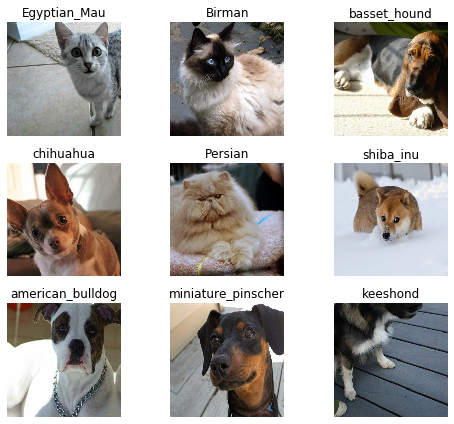

In [11]:
data.show_batch(rows=3, figsize = (7,6))

In [12]:
print (data.classes)
len (data.classes), data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [14]:
#Convolutional neural network learner. 
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [16]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.392078,0.374865,0.115697,01:28
1,0.622254,0.282019,0.087280,01:28
2,0.414768,0.255700,0.075101,01:28
3,0.295108,0.235813,0.074425,01:31


In [0]:
learn.save('stage-1')

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

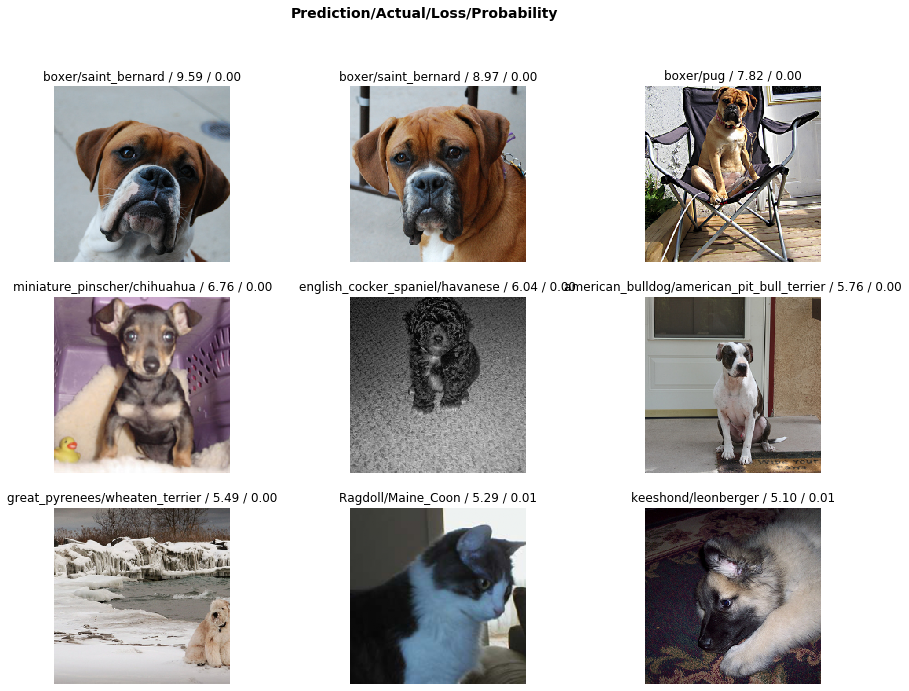

In [19]:
interp.plot_top_losses(9, figsize = (15,11))

In [21]:
doc(interp.plot_top_losses)

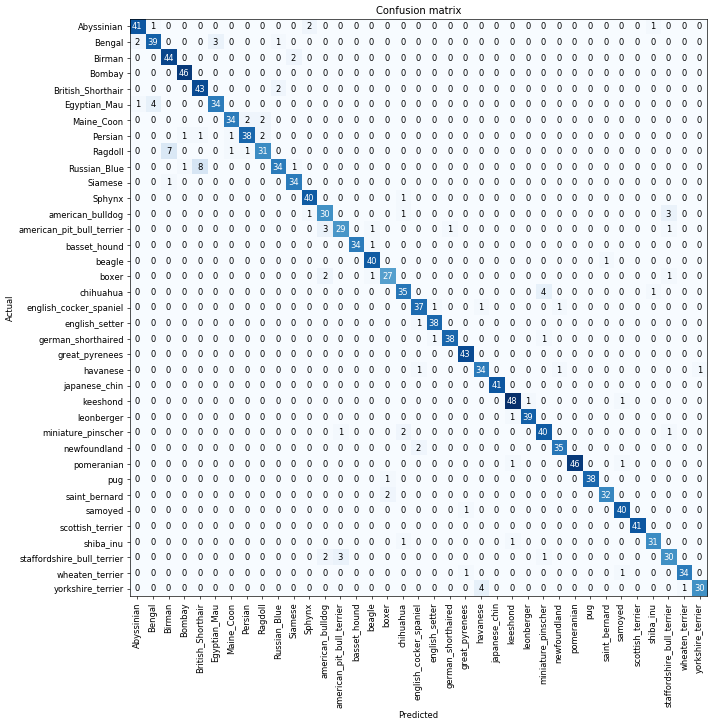

In [22]:
interp.plot_confusion_matrix(figsize= (12,12), dpi=60)

In [23]:
interp.most_confused(min_val = 2)

[('Russian_Blue', 'British_Shorthair', 8),
 ('Ragdoll', 'Birman', 7),
 ('Egyptian_Mau', 'Bengal', 4),
 ('chihuahua', 'miniature_pinscher', 4),
 ('yorkshire_terrier', 'havanese', 4),
 ('Bengal', 'Egyptian_Mau', 3),
 ('american_bulldog', 'staffordshire_bull_terrier', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('Abyssinian', 'Sphynx', 2),
 ('Bengal', 'Abyssinian', 2),
 ('Birman', 'Siamese', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Maine_Coon', 'Persian', 2),
 ('Maine_Coon', 'Ragdoll', 2),
 ('Persian', 'Ragdoll', 2),
 ('boxer', 'american_bulldog', 2),
 ('miniature_pinscher', 'chihuahua', 2),
 ('newfoundland', 'english_cocker_spaniel', 2),
 ('saint_bernard', 'boxer', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2)]

In [0]:
learn.unfreeze()

In [25]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.700220,0.396553,0.125169,01:32


In [26]:
learn.load ('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Birman,Bombay,shiba_inu,samoyed,Bengal
Path: /content/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
japanese_chin,Bengal,basset_hound,pug,Siamese
Path: /content/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  

In [27]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


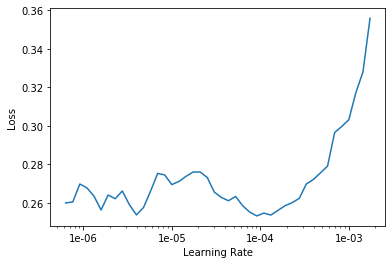

In [28]:
learn.recorder.plot()

In [29]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr= slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.251903,0.224314,0.071042,01:31
1,0.223668,0.223227,0.069012,01:31
